In [ ]:
# !pip install keras-tuner

### Importing the libraries

In [1]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
import glob

In [4]:
from PIL import Image

### Reading the dataset

In [5]:
# this reads all the paths of all folders present in flowers.
allFlowers = glob.glob("D:/Is-the-road-safe-/Assignment-2/flowers/*/**") 

In [6]:
len(allFlowers)

15740

In [7]:
from random import shuffle

In [8]:
shuffle(allFlowers)

In [9]:
allFlowers[0].split("\\")[1]

'astilbe'

In [10]:
X_train=np.zeros((len(allFlowers),128, 128,3))

In [11]:
im = Image.open(allFlowers[0]).resize((128,128))

In [12]:
arr = np.array(im)

In [13]:
arr.shape


(128, 128, 3)

In [14]:
im2 = Image.open(allFlowers[9800]).resize((128,128))

In [15]:
arr1 = np.array(im2)

In [16]:
if arr.shape == arr1.shape:
    print("Yes")

Yes


In [17]:
Y_train= []

In [18]:

for i, ft in enumerate(allFlowers):
    im=Image.open(ft).resize((128,128))
    arr1 = np.array(im)
    
    if arr.shape != arr1.shape:
        X_train[i] = np.array(im.convert('RGB'))
    else:
        X_train[i] = arr1
        
    Y_train.append(ft.split("\\")[1])

In [19]:
len(Y_train)

15740

In [20]:
X_train = X_train/255

In [21]:
X_train[0]

array([[[0.04313725, 0.06666667, 0.04313725],
        [0.06666667, 0.09019608, 0.07843137],
        [0.07843137, 0.10196078, 0.10196078],
        ...,
        [0.10588235, 0.10980392, 0.08235294],
        [0.27843137, 0.29803922, 0.22745098],
        [0.40784314, 0.21568627, 0.17254902]],

       [[0.03137255, 0.05490196, 0.03137255],
        [0.04313725, 0.06666667, 0.05490196],
        [0.03137255, 0.04705882, 0.04705882],
        ...,
        [0.05098039, 0.05882353, 0.02745098],
        [0.11764706, 0.14117647, 0.07058824],
        [0.38823529, 0.19607843, 0.15294118]],

       [[0.04313725, 0.0627451 , 0.03921569],
        [0.03529412, 0.05490196, 0.04313725],
        [0.01176471, 0.02745098, 0.02745098],
        ...,
        [0.10196078, 0.1254902 , 0.0745098 ],
        [0.09411765, 0.12156863, 0.03529412],
        [0.42745098, 0.23921569, 0.18431373]],

       ...,

       [[0.49411765, 0.61176471, 0.47843137],
        [0.49019608, 0.6       , 0.48235294],
        [0.49019608, 0

In [22]:
len(Y_train)

15740

In [23]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [24]:
Y_train = lb.fit_transform(Y_train)

In [25]:
Y_train

array([0, 0, 4, ..., 1, 3, 4], dtype=int64)

### Using a self-defined Model

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [29]:
model.fit(X_train,Y_train, epochs = 3, validation_split = 0.1)

Epoch 1/3
443/443 [==============================] - 214s 469ms/step - loss: 1.8139 - accuracy: 0.3799 - val_loss: 1.3899 - val_accuracy: 0.5241
Epoch 2/3
443/443 [==============================] - 217s 490ms/step - loss: 1.3041 - accuracy: 0.5556 - val_loss: 1.2845 - val_accuracy: 0.5769
Epoch 3/3
443/443 [==============================] - 217s 489ms/step - loss: 1.0838 - accuracy: 0.6326 - val_loss: 1.1362 - val_accuracy: 0.6169


#### The accuracy of the model when we self define the model is : 63.26%

### Using keras-tuner to find the appropriate values for the Hyper Parameters

In [30]:
def  model_builder(hp):
    
    model= keras.Sequential([
        
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=16, max_value=64, step=16),#min value of filter you want
            kernel_size=hp.Choice('conv_1_kernel', values = [2,5]),#picks like mcq
            activation='relu',
            input_shape=(128,128,3)
        ),
        keras.layers.MaxPooling2D(
            pool_size = (2,2)
        ),
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=16, max_value=64, step=8),#min value of filter you want
            kernel_size=hp.Choice('conv_2_kernel', values = [2,5]),#picks like mcq
            activation='relu',
        ),
        keras.layers.MaxPooling2D(
            pool_size = (2,2)
        ),
        keras.layers.Conv2D(
            filters=hp.Int('conv_3_filter', min_value=16, max_value=64, step=16),#min value of filter you want
            kernel_size=hp.Choice('conv_3_kernel', values = [2,5]),#picks like mcq
            activation='relu',
        ),
        keras.layers.MaxPooling2D(
            pool_size = (2,2)
        ),
        
        keras.layers.Flatten(),

        keras.layers.Dense(
            units=hp.Int('dense_1_units', min_value=32, max_value=512, step=16),
            activation='relu'
        ),
        keras.layers.Dense(
            units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),
            activation='relu'
        ),
        
        keras.layers.Dense(16, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    return model
    

In [31]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [36]:
tuner_search=RandomSearch(model_builder,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Flower_HyperTune1")

In [37]:
tuner_search.search(X_train, Y_train ,epochs=2,validation_split=0.1)

Trial 5 Complete [00h 08m 18s]
val_accuracy: 0.07560355961322784

Best val_accuracy So Far: 0.5578144788742065
Total elapsed time: 00h 31m 57s
INFO:tensorflow:Oracle triggered exit


In [41]:
tuner_model=tuner_search.get_best_models(num_models=1)[0]


In [42]:
tuner_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 48)        12336     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        6176      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [43]:
history_of_model = tuner_model.fit(X_train , Y_train , epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
443/443 [==============================] - 176s 387ms/step - loss: 1.1090 - accuracy: 0.6256 - val_loss: 1.2586 - val_accuracy: 0.5724
Epoch 5/10
443/443 [==============================] - 167s 377ms/step - loss: 0.8804 - accuracy: 0.7034 - val_loss: 1.2043 - val_accuracy: 0.6010
Epoch 6/10
443/443 [==============================] - 171s 385ms/step - loss: 0.6679 - accuracy: 0.7659 - val_loss: 1.3385 - val_accuracy: 0.6042
Epoch 7/10
443/443 [==============================] - 181s 410ms/step - loss: 0.5018 - accuracy: 0.8246 - val_loss: 1.4569 - val_accuracy: 0.6017
Epoch 8/10
443/443 [==============================] - 176s 398ms/step - loss: 0.3292 - accuracy: 0.8864 - val_loss: 1.7190 - val_accuracy: 0.5985
Epoch 9/10
443/443 [==============================] - 182s 410ms/step - loss: 0.2493 - accuracy: 0.9120 - val_loss: 2.0134 - val_accuracy: 0.5839
Epoch 10/10
443/443 [==============================] - 171s 385ms/step - loss: 0.1904 - accuracy: 0.9351 - val_loss: 2.0250 

### Here we can see that the model trained has an accuracy of 93.51%

In [44]:
history_of_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

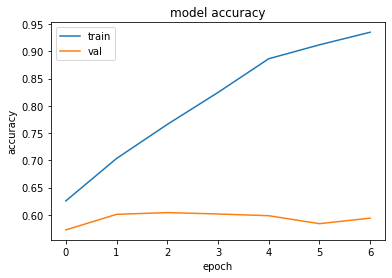

In [47]:
plt.plot(history_of_model.history['accuracy'])
plt.plot(history_of_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

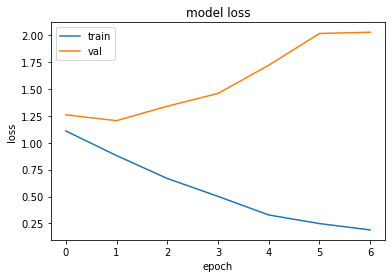

In [48]:
plt.plot(history_of_model.history['loss'])
plt.plot(history_of_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Hyperparameters

In [49]:
tuner_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 128, 128, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv2d_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'batch_input_shape': (None, 128, 128, 3),
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (5, 5),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
   